<br><h2><center>Unsupervised Analysis Project</center></h2>
<br><center>Team 15</center>
<br><center>Wael Breich | Jeannette Reyes | Alexey Yushkin</center>
<br><center>Hult International Business School</center>
<br><center>BMsBA1</center>
<br>
<br><center>Machine Learning - DAT-5303</center>
<br><center>Professor Chase Kusterer</center>
<br><center>February 22, 2021

<h3><center>Introduction</center></h3>

Apple Inc. has been researching several aspects of consumer behavior to better understand their decision-making process when it comes to buying a new laptop. In an attempt to understand whether consumers prefer a Windows or Mac laptop, Apple decided to look at the Big Five personality traits and the Hult DNA. We assume that the survey data, including its demographics, represent the population Apple Inc. is attempting to study.

<h3><center>Big Five personality traits</center></h3>

According to researchers, there are five core personality traits. Each dimension is a measure in a range between the two polar ends of different characteristics:
- Openness - Level of imaginations, curiosity, and eagerness to learn new things or experiences.
- Conscientiousness -  Level of thoughtfulness, impulse control, and goal-directed behaviors (planning, organization).
- Extroversion - Level of excitability, sociability, talkativeness, assertiveness, and emotional expressiveness.
- Agreeableness - Level of trust, altruism, kindness, affection, and other pro-social behaviors.
- Neuroticism - Level of moodiness and emotional instability.

Although most people's behavior tends to be consistent with the underlying personality traits, they can also learn some skills to achieve a growth mindset.

<h3><center>Hult DNA</center></h3>

Hult DNA proposes a set of aspirations for Hult students' professional development and a tool to assist in aligning their skills with future employer needs. This framework involves three primary leadership skills that the world's leading employees highly value. They describe nine behavioral skills as follow:

- Thinking: 
    - i) Show self-awareness 
    - ii) Embraces change 
    - iii) Demonstrate dynamic thinking
 
- Communicating: 
    - i) Speaks and listen carefully 
    - ii) Influences confidently 
    - iii) Present ideas effectively
    
- Team Building:  
    - i) Foster Collaborative Relationships 
    - ii) Inspires Productivity 
    - iii) Resolve Conflict constructively

<h3><center>Loading and cleaning data</center></h3>

In [1]:
# importing packages
# mathematical essentials
import numpy as np

# data science essentials
import pandas as pd

# fundamental data visualization
import matplotlib.pyplot as plt  

# enhanced visualizations
import seaborn as sns

# standard scaler
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage 

# k-means clustering
from sklearn.cluster import KMeans      

# deactivating warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting visualization style 
sns.set_style('whitegrid')

# setting palette
my_palette = sns.color_palette("gist_earth")
sns.set_palette(my_palette)

In [3]:
# setting print options
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500

In [4]:
# loading data
data_full = pd.read_excel('./datasets/survey_data.xlsx')

# data_full.head(n=3)

In [5]:
# # checking missing values
# data_full.isnull().any().any()

The dataset does not have any missing values.

The column 'surveyID' doesn't provide us with any useful information and can be removed.

In [6]:
# removing the column which is not needed
data = data_full.drop('surveyID', axis=1)

In [7]:
####################### processing demographic columns #######################

In [8]:
# # checking the column nationality
# data_full['What is your nationality? '].value_counts()

In [9]:
# # checking the column ethnicity
# data_full['What is your ethnicity?'].value_counts()

The nationality column has inconsistent data. This means it should be cleaned up. On the other hand, there are not so many observations for each nationality. Considering that we have division by ethnicity, which forms larger groups, it makes sense not to use nationality variable.

In [10]:
# removing nationality column
data.drop('What is your nationality? ', axis=1, inplace=True)

In [11]:
# # checking the column gender
# data['Gender'].value_counts()

In [12]:
# # checking the column age
# data['What is your age?'].value_counts().sort_index()

Since ages up to 23 and greater than 27 have considerably fewer observations, it makes sense to aggregate age as up to 24 yo, 25-29 yo, and 30+ yo.

In [13]:
# defining a function for creating age groups
def age_groups(x):
    
    # yanger than 25
    if x <= 24:
        return 'up to 24'
    
    # from 25 to 29
    if x <= 29:
        return '25-29'
    
    # older than 29
    else:
        return '30+'

In [14]:
# creating column for age groups
data['Age Group'] = data['What is your age?'].apply(age_groups)

# removing column with ages
data.drop('What is your age?', axis=1, inplace=True)

In [15]:
# # checking the column program
# data['What program are you in?'].value_counts()

Since DD (MBA & Disruptive innovation) has only one observation, it makes sense to join all DD MBAs together.

In [16]:
# combining DD MBAs programs
data['What program are you in?'].\
                            replace({'DD (MBA & Business Analytics)': 'DD MBA',
                                     'DD (MBA & Disruptive innovation)': 'DD MBA'}, 
                                    inplace=True)

In [17]:
################## processing laptop types related columns ###################

In [18]:
# # checking the current laptop type
# data['What laptop do you currently have?'].value_counts()

We can see that about half of the respondents have Macbooks and the other half have Windows laptops.

In [19]:
# # checking the planning laptop type
# data['What laptop would you buy in next assuming if all laptops cost the same?']\
#                             .value_counts()

Since we need to prepare recommendations for Apple Inc., we can divide laptop types as Macbook and Other, keeping in mind that most of the Other laptops use Windows.

In [20]:
# replacing the current laptop types
data['What laptop do you currently have?'].\
                            replace('Windows laptop', 'Other', inplace=True)

# replacing the planning laptop types
data['What laptop would you buy in next assuming if all laptops cost the same?'].\
                            replace({'Windows laptop': 'Other',
                                     'Chromebook': 'Other'}, inplace=True)

In [21]:
######################## processing questions columns ########################

In [22]:
# # checking answers variables statictics
# data.describe()

In [23]:
# # checking questions
# list(data.describe().columns)

The questions 'Respond effectively to multiple priorities,' 'Encourage direct and open discussions,' and "Take initiative even when circumstances, objectives, or rules aren't clear" are doubled. And in some cases, the same persons' answers to the same questions are different. To minimize possible errors, we will take rounded averages of the responses.

In [24]:
# averaging and rounding answers
data['Respond effectively to multiple priorities'] = \
    ((data['Respond effectively to multiple priorities'] \
    + data['Respond effectively to multiple priorities.1']) / 2).round(0)

# removing the columns which is not needed
data.drop('Respond effectively to multiple priorities.1', axis=1, inplace=True)

In [25]:
# averaging and rounding answers
data['Encourage direct and open discussions'] = \
    ((data['Encourage direct and open discussions'] \
    + data['Encourage direct and open discussions.1']) / 2).round(0)

# removing the columns which is not needed
data.drop('Encourage direct and open discussions.1', axis=1, inplace=True)

In [26]:
# averaging and rounding answers
data["Take initiative even when circumstances, objectives, or rules aren't clear"] = \
    ((data["Take initiative even when circumstances, objectives, or rules aren't clear"] \
    + data["Take initiative even when circumstances, objectives, or rules aren't clear.1"]) \
    / 2).round(0)

# removing the columns which is not needed
data.drop("Take initiative even when circumstances, objectives, or rules aren't clear.1", \
          axis=1, inplace=True)

In [27]:
# subsetting answers
data_answers = data.iloc[:, 0:68]

In [28]:
# # checking respondents with little variance in answers
# for row in range(len(data)):
#     if data_answers.iloc[row, :].var() < 0.5:
#         print(row, '\n')
#         print(data_answers.iloc[row, :].describe(), '\n')
#         print(data_answers.iloc[row, :], '\n\n')

There are patterns (long series of the same numbers) observed in answers of 17th, 59th and 110th respondents. To prevent this untrustworthy data from affecting our results, we will remove those observations.

In [29]:
# removing rows with answers which demonstrate patterns
data.drop([17, 59, 110], axis=0, inplace=True)

<h3><center>Creating variables connected to Big Five traits and Hult DNA elements</center></h3>
<br>We identified questions related to the various Big Five and Hult DNA elements, and we will create variables corresponding to these elements.

In [30]:
# creating extraversion variable 
data['extraversion'] = data["Am the life of the party"] \
                       - data["Don't talk a lot"] \
                       + data["Feel comfortable around people"] \
                       - data["Keep in the background"] \
                       + data["Start conversations"] \
                       - data["Have little to say"] \
                       + data["Talk to a lot of different people at parties"] \
                       - data["Don't like to draw attention to myself"] \
                       + data["Don't mind being the center of attention"] \
                       - data["Am quiet around strangers"]

In [31]:
# creating neuroticism variable 
data['neuroticism'] = data["Get stressed out easily"] \
                      - data["Am relaxed most of the time"] \
                      + data["Worry about things"] \
                      - data["Seldom feel blue"] \
                      + data["Am easily disturbed"] \
                      + data["Get upset easily"] \
                      + data["Change my mood a lot"] \
                      + data["Have frequent mood swings"] \
                      + data["Get irritated easily"] \
                      + data["Often feel blue"]

In [32]:
# creating conscientiousness variable 
data['conscientiousness'] = data["Am always prepared"] \
                            - data["Leave my belongings around"] \
                            + data["Pay attention to details"] \
                            - data["Make a mess of things"] \
                            + data["Get chores done right away"] \
                            - data["Often forget to put things back in their proper place"] \
                            + data["Like order"] \
                            - data["Shirk my duties"] \
                            + data["Follow a schedule"] \
                            + data["Am exacting in my work"]

In [33]:
# creating agreeableness variable 
data['agreeableness'] = - data["Feel little concern for others"] \
                        + data["Am interested in people"] \
                        - data["Insult people"] \
                        + data["Sympathize with others' feelings"] \
                        - data["Am not interested in other people's problems"] \
                        + data["Have a soft heart"] \
                        - data["Am not really interested in others"] \
                        + data["Take time out for others"] \
                        + data["Feel others' emotions"] \
                        + data["Make people feel at ease"]

In [34]:
# creating openness variable 
data['openness'] = data["Have a rich vocabulary"] \
                   - data["Have difficulty understanding abstract ideas"] \
                   + data["Have a vivid imagination"] \
                   - data["Am not interested in abstract ideas"] \
                   + data["Have excellent ideas"] \
                   - data["Do not have a good imagination"] \
                   + data["Am quick to understand things"] \
                   + data["Use difficult words"] \
                   + data["Spend time reflecting on things"] \
                   + data["Am full of ideas"]

In [35]:
# creating thinking variable 
data['thinking'] = \
    data["See underlying patterns in complex situations"] \
    - data["Don't  generate ideas that are new and different"] \
    + data["Demonstrate an awareness of personal strengths and limitations"] \
    + data["Display a growth mindset"] \
    + data["Respond effectively to multiple priorities"] \
    + data["Take initiative even when circumstances, objectives, or rules aren't clear"]

In [36]:
# creating communicating variable 
data['communicating'] = \
    data["Encourage direct and open discussions"] \
    + data["Listen carefully to others"] \
    - data["Don't persuasively sell a vision or idea"] \
    + data["Build cooperative relationships"] \
    + data["Work well with people from diverse cultural backgrounds"] \
    + data["Effectively negotiate interests, resources, and roles"]

In [37]:
# creating team_building variable 
data['team_building'] = \
    - data["Can't rally people on the team around a common goal"] \
    + data["Translate ideas into plans that are organized and realistic"] \
    + data["Resolve conflicts constructively"] \
    + data["Seek and use feedback from teammates"] \
    + data["Coach teammates for performance and growth"] \
    + data["Drive for results"]

We will create a separate DataFrame containing variables relevant to the Big Five and Hult DNA.

In [38]:
# creating DataFrame with traits
data_traits = data[['extraversion', 'neuroticism', 'agreeableness',
                    'openness', 'conscientiousness',
                    'thinking', 'communicating', 'team_building']]

For later use, we will create lists of variables related to demographics and variables related to types of laptops.

In [39]:
# creating list of demographic columns names
dem_cols = ['What program are you in?', 'Gender', 'What is your ethnicity?',
            'Age Group']

In [40]:
# creating list of laptop types related columns names
laptop_types = ['What laptop do you currently have?',
                'What laptop would you buy in next assuming if all laptops cost the same?']

<h3><center>Data Preparation</center></h3>

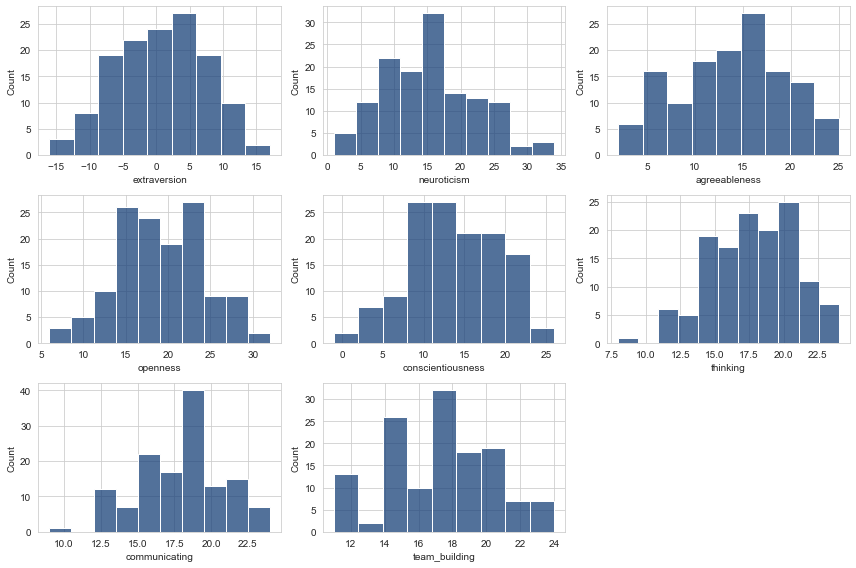

In [41]:
# checking the distributions
# setting figure size
fig, ax = plt.subplots(figsize=(12, 8))

# initializing a counter
count = 0

# looping to create visualizations
for col in data_traits:

    # condition to break
    if count == len(data_traits):
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(3, 3, count)
    sns.histplot(x=data_traits[col])

# formatting and displaying the plot
plt.tight_layout()
plt.show()

As seen in the visualizations, the distributions of the variables are close to normal, but in some cases (for example, neuroticism, thinking, communicating, and agreeableness) the distributions are skewed. Next, we check if the skewness is acceptable.

In [42]:
# checking skewness and kurtosis
data_traits.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
extraversion,-0.033683,-0.449963
neuroticism,0.327321,-0.250331
agreeableness,-0.159292,-0.595927
openness,0.057707,-0.279550
conscientiousness,-0.090860,-0.484820
thinking,-0.306973,-0.260468
communicating,-0.173316,-0.052907
team_building,-0.045609,-0.433966


Since skewness is between -0.5 and 0.5, the distributions are approximately symmetric, so transformations are not needed.

For the clustering algorithm to work well, all variables must have the same variance. For this purpose, we apply scaling. 

In [43]:
# scaling the data
# instantiating a StandardScaler() object
scaler = StandardScaler()

# fitting the scaler with the data
scaler.fit(data_traits)

# transforming our data after fit
X_scaled = scaler.transform(data_traits)

# converting scaled data into a DataFrame
data_scaled = pd.DataFrame(X_scaled)

# reattaching column names
data_scaled.columns = data_traits.columns

# # checking pre- and post-scaling variance
# print(pd.np.var(data_traits), '\n')
# print(pd.np.var(data_scaled))

<h3><center>Principal Component Analysis</center></h3>

We will use Principal Component Analysis to create uncorrelated variables. This allows us to maximize variance which gives an opportunity to reduce the dimensionality and to increase the interpretability of the results.

In [44]:
# defining scree_plot function to visualize explained variance
def scree_plot(pca_object, export=False):
    """
Building a scree plot
    """

    # setting plot size
    fig, ax = plt.subplots(figsize=(8, 6))
    features = range(pca_object.n_components_)

    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth=2,
             marker='o',
             markersize=10,
             markeredgecolor='black',
             markerfacecolor='grey')

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

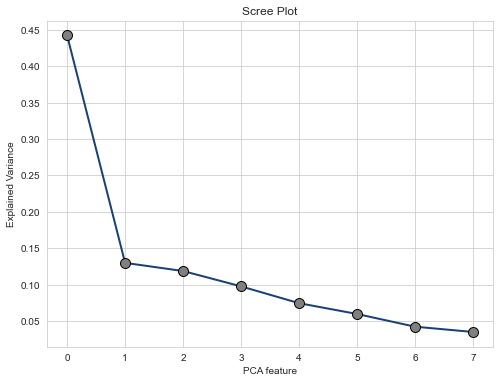

In [45]:
# instantiating a PCA object with no limit to principal components
pca = PCA(n_components=None,
          random_state=219)

# fitting and transforming the scaled data
customer_pca = pca.fit_transform(data_scaled)

# calling the scree_plot function
scree_plot(pca_object=pca)

One can see the elbow at the principal component 1, but since components 1 and 2 together explain about 57% of the variance, we need to increase the number of principal components. To explain at least 80% of the variance, we have to use six principal components.

In [46]:
# printing the sum of explained variance ratios for given number 
# of principal components
print(pca.explained_variance_ratio_[0:5].sum())

0.8628897501707055


In [47]:
# instantiating a new model using the first three principal components
pca_6 = PCA(n_components=6,
            random_state=219)

# fitting and transforming the scaled data
customer_pca_6 = pca_6.fit_transform(data_scaled)

# # calling the scree_plot function
# scree_plot(pca_object = pca_6)

As a result, we got six Personas with the following sets of components. 

In [48]:
# transposing pca components
factor_loadings = pd.DataFrame(pd.np.transpose(pca_6.components_))

# naming rows as original features
factor_loadings = factor_loadings.set_index(data_scaled.columns)

# checking the results
print(f"""
6 Components Factor Loadings
----------------------------
{factor_loadings.round(2)}
""")


6 Components Factor Loadings
----------------------------
                      0     1     2     3     4     5
extraversion      -0.22 -0.08  0.87 -0.05 -0.40 -0.08
neuroticism        0.10  0.93 -0.04 -0.02 -0.28 -0.16
agreeableness     -0.33  0.10  0.01 -0.74  0.40 -0.38
openness          -0.36  0.12  0.07  0.62  0.47 -0.34
conscientiousness -0.34 -0.26 -0.47 -0.04 -0.59 -0.36
thinking          -0.46  0.06 -0.04  0.24 -0.15 -0.13
communicating     -0.45  0.03  0.04 -0.10  0.14  0.35
team_building     -0.42  0.18 -0.15 -0.04 -0.07  0.66



We identified six types of Customer-Level Persona as follows.

- Silly Introvert. This persona is quiet and reserved and doesn't like drawing attention to themselves. Tend to live one day at a time and don't worry about life in excess, a bit lazy and disorganized.
- Neurotic. This persona is temperamental and self-conscious. They manage to work and collaborate with people, and they will assume responsibility for their work. Although, they won't play a leadership role in teams.
- Unconscious Experimenter. This persona enjoys a social life, is highly talkative and tend to be irresponsible, lazy, and don't mind arriving late
- Disagreeable Experimenter. They are open to new experiences but are not collaborative and kind; it is possible that this persona likes to show-off.
- Entrepreneur. They have many ideas and are passionate about innovation. They enjoy working with people. They have a high level of risk acceptance and a low level of assertiveness due to imagination. They communicate effectively and have experiences in pitching their ideas
- Team Builder. This persona fosters team relationships and might have the ability to resolve conflicts constructively. However, it is not so collaborative, organized, and self-conscious.

Rename the DataFrame columns according to the conditional names for each persona. 

In [49]:
# naming each principal component
factor_loadings.columns = ['Silly Introvert', # no thinking, no communicating, no team_building
                           'Neurotic', # neuroticism
                           'Unconscious Experimenter', # extraversion, no conscientiousness
                           'Disagreeable Experimenter', # no agreeableness, openness
                           'Entrepreneur', # no extraversion, agreeableness, openness, no conscientiousness
                           'Team Builder'] # team_building 

# # checking the result
# factor_loadings

Creating a DataFrame with each respondent's principal components.

In [50]:
# converting factor strengths per customer to a DataFrame
pca_df = pd.DataFrame(customer_pca_6)

# renaming columns
pca_df.columns = factor_loadings.columns

# # checking result
# pca_df

<h3><center>Preparing to Clustering</center></h3>

Since the variances have changed, we need to run the scaling one more time.

In [51]:
# prepare a scaled version of the factor loadings dataset
# instantiating a StandardScaler() object
scaler = StandardScaler()

# fitting the scaler with the data
scaler.fit(pca_df)

# transfirming our data after fit
x_scaled = scaler.transform(pca_df)

# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(x_scaled)

# reattaching column names
pca_scaled.columns = pca_df.columns

# # checking pre- and post-scaling variance
# print(pd.np.var(pca_df), '\n')
# print(pd.np.var(pca_scaled))

To determine the optimal number of clusters we use the dendrogram. 

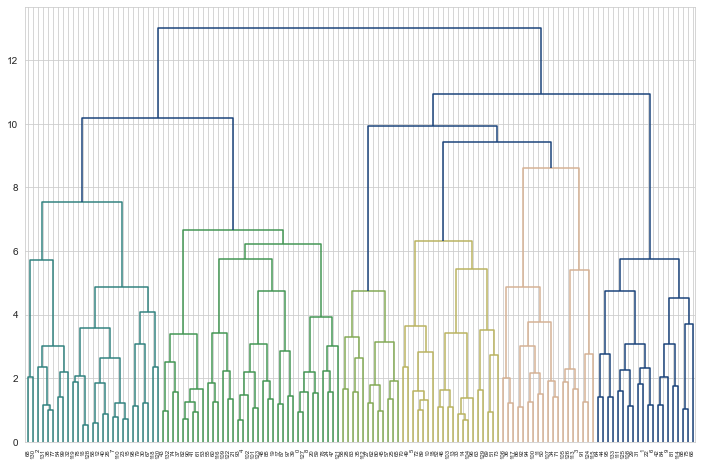

In [52]:
# developing a dendrogram
# grouping data based on Ward distance
standard_mergings_ward = linkage(y=pca_scaled,
                                 method='ward',
                                 optimal_ordering=True)

# setting plot size
fig, ax = plt.subplots(figsize=(12, 8))

# developing a dendrogram
dendrogram(Z=standard_mergings_ward,
           leaf_rotation=90,
           leaf_font_size=6)

# displaying the plot
plt.show()

To develop more candidates for the number of clusters we can use an inertia plot.

In [53]:
# defining the function for visualizing inertia 
def inertia_plot(data, max_clust=50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # instantiating a kmeans object
        model = KMeans(n_clusters=k)

        # fitting to the data
        model.fit(data)

        # appending each inertia to the list of inertias
        inertias.append(model.inertia_)


    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.plot(ks, inertias, '-o')

    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

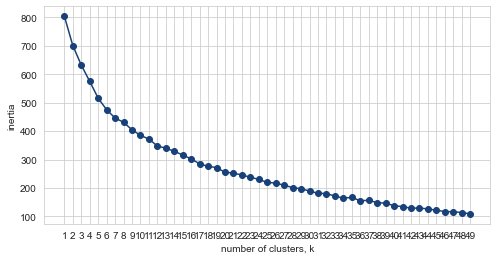

In [54]:
# calling the inertia_plot() function
inertia_plot(pca_scaled)

Looking at the dendrogram and the inertia plot it seems reasonable to use 6 clusters.

<h3><center>Developing a k-Means Model with six Clusters</center></h3>

Fitting the model to the data. 

In [55]:
# instantiating a k-Means object with six clusters
respondents_k_pca = KMeans(n_clusters=6,
                           random_state=219)

# fitting the object to the data
respondents_k_pca.fit(pca_scaled)

# converting the clusters to a DataFrame
respondents_kmeans_pca = pd.DataFrame({'Cluster': respondents_k_pca.labels_})

# # checking how many respondents in each group
# print(respondents_kmeans_pca.iloc[: , 0].value_counts())

We got six clusters with the number of observations from 17 to 26, having the following centroids.

In [56]:
# storing cluster centers
centroids_pca = respondents_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# renaming principal components
centroids_pca_df.columns = pca_scaled.columns

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Silly Introvert,Neurotic,Unconscious Experimenter,Disagreeable Experimenter,Entrepreneur,Team Builder
0,-0.50,-0.72,-0.39,-0.38,-0.94,0.49
1,1.13,-0.35,0.14,-0.41,-0.24,-0.66
2,0.16,1.41,-0.37,-0.62,0.33,0.02
3,-0.17,-0.18,-1.21,0.97,1.09,-0.20
4,-0.76,-0.36,0.88,-0.35,0.87,-0.01
5,0.05,0.34,0.73,1.13,-0.66,0.32


<h3><center>Analysis of Clusters</center></h3>

Combine demographic information with personal characteristics. 

In [57]:
# concatenating clusters' numbers and PCA components into one DataFrame
clst_pca_df = pd.concat([respondents_kmeans_pca,
                         pca_df],
                        axis = 1)

# # checking results
# print(clst_pca_df.head(5))

In [58]:
# concatenating demographic information as well as information about 
# laptop type preferences with pca-clusters
final_df = pd.concat([data.loc[:, dem_cols], 
                      data.loc[:, laptop_types],
                      clst_pca_df], 
                     axis = 1)

In [59]:
# renaming clusters
cluster_names = {0: 'Cluster 0',
                 1: 'Cluster 1',
                 2: 'Cluster 2',
                 3: 'Cluster 3',
                 4: 'Cluster 4',
                 5: 'Cluster 5'}

final_df['Cluster'].replace(cluster_names, inplace=True)

In [60]:
# # checking the results
# final_df.head(5)

Let us visually analyze the obtained clusters.

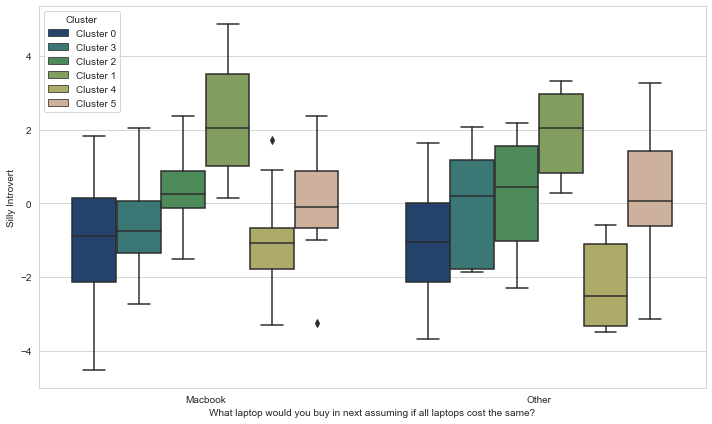

In [61]:
# Silly Introverts
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='What laptop would you buy in next assuming if all laptops cost the same?',
            y='Silly Introvert',
            hue='Cluster',
            data=final_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

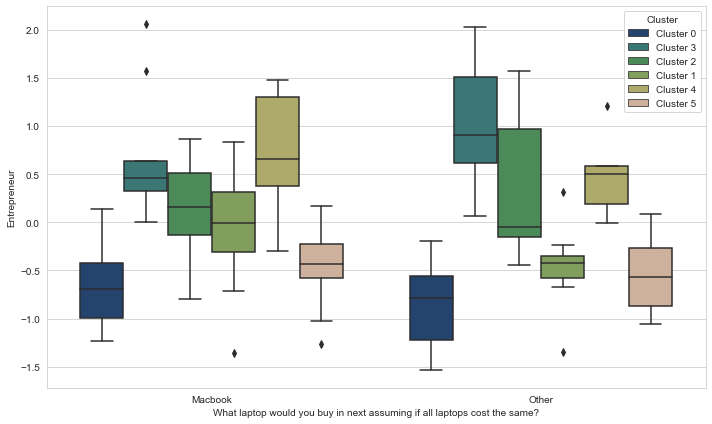

In [62]:
# Entrepreneurs
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='What laptop would you buy in next assuming if all laptops cost the same?',
            y='Entrepreneur',
            hue='Cluster',
            data=final_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

We analyzed visualizations by persona type and cluster for possible patterns in relation to past and present purchasing preferences, as well as demographic information. 

We also analyzed the clusters in terms of demographic information. 

In [63]:
# # analysing programs using grouping by clusters
# final_df.groupby(['Cluster'])['What program are you in?'].value_counts()

In [64]:
# # analysing genders using grouping by clusters
# final_df.groupby(['Cluster'])['Gender'].value_counts()

In [65]:
# # analysing ethnicity using grouping by clusters
# final_df.groupby(['Cluster'])['What is your ethnicity?'].value_counts()

In [66]:
# # analysing age using grouping by clusters
# final_df.groupby(['Cluster'])['Age Group'].value_counts()

In [67]:
# # analysing currently owned laptop using grouping by clusters
# final_df.groupby(['Cluster'])['What laptop do you currently have?'].value_counts()

In [68]:
# # analysing purchasing intention using grouping by clusters
# final_df.groupby(['Cluster'])\
#     ['What laptop would you buy in next assuming if all laptops cost the same?'] \
#     .value_counts()

<h3><center>Why Apple?</center></h3>

Mac users value the fact that Apple develops software and hardware; this factor represents the user's practicality when deciding on a computer or for maintenance. They can have their solutions in just one place.

Creative professionals, video designers or editors, and web developers or programmers value their graphical user interface. As well as the safety providing better protections against malware or viruses.

Other features valuable for users are the hardware design and Apple's philosophy. Both are aligned to be simple and 'think different.'  These elements set Mac computers as a high-end product.

<h3><center>Insights and Recommendations</center></h3>

There is no significant difference between clusters in terms of demographic information.

If a respondent has Macbook, most likely their next laptop will be also Macbook.

Our goal is to find people who can switch from Windows laptops to Macbook and recommend them as the target audience. Therefore, when developing marketing campaigns, it makes sense to focus on those respondents who are part of the groups that are disposed to buy a Macbook, but themselves plan to buy another laptop.
Entrepreneurs and Silly Introverts are more prone to purchase Macbook.

- A Silly Introvert personality might prefer Macbook because it is looking for friendly software and hardware to avoid making so many decisions and can synchronize their phone with their lap without complex processes. Since their characteristics are similar to the ISFP personality type, we can assume that around 8.8% of the general population are Silly Introverts.
- Entrepreneurs prefer Mac because they might feel identified with Apple's philosophy and also history. They need versatility due to their high level of innovation and graphical user interface to develop their video/photo pitching ideas. Their lack of time requires practicality on their equipment maintenance and good customer services to understand the needs and empathize with them. Since their characteristics are similar to the ENFP personality type, we can assume that around 8.1% of the general population are Entrepreneurs.

Marketing campaigns also make sense to plan for those respondents who are part of a cluster that is generally more likely to purchase another laptop but may change their minds. Among our personas, these are Unconscious Experimenters.

<h3><center>References</center></h3>

39 entrepreneur statistics you need to know in 2021. (2021, January 05). *smallbizgenius.net.* Retrieved February 22, 2021, from https://www.smallbizgenius.net/by-the-numbers/entrepreneur-statistics/

Andronico, M. (2020, December 11). MacBooks vs WINDOWS LAPTOPS: Which is best for you? *CNN UNDERSCORED.* Retrieved February 22, 2021 from https://us.cnn.com/2020/12/11/cnn-underscored/windows-vs-macbook#:~:text=The%20biggest%20difference%20between%20Windows,up%20to%20your%20other%20devices

C. O. M. (2019, May 24). *The OWC blog.* Retrieved February 19, 2021 from https://eshop.macsales.com/blog/48820-what-percent-of-people-prefer-mac-over-pc/

CareerPlanner.com, M. (n.d.). All about the enfp personality type. *careerplanner.com.* Retrieved February 22, 2021, from https://www.careerplanner.com/MB2/PersonalityType-ENFP.cfm

CareerPlanner.com, M. (n.d.). All about The Isfp personality type. *careerplanner.com.* Retrieved February 22, 2021, from https://www.careerplanner.com/MB2/PersonalityType-ISFP.cfm

Cherry K. (2020, July 13). The Big Five Personality Traits. *verywellmind.com.* Retrieved February 18, 2021 from https://www.verywellmind.com/the-big-five-personality-dimensions-2795422#:~:text=The%20five%20broad%20personality%20traits,how%20many%20personality%20traits%20exist

Inc., M. (n.d.). How rare is your personality type? *careerplanner.com.* Retrieved February 22, 2021, from https://www.careerplanner.com/MB2/TypeInPopulation.cfm

Lin, Y. (2021, February 04). 10 entrepreneur stats that you need to know in 2021. *oberlo.com.* Retrieved February 22, 2021, from https://www.oberlo.com/blog/entrepreneur-statistics

Farr, C. (2019, June). Digital crafts. *digitalcrafts.com.* Retrieved February 20, 2021 from https://www.digitalcrafts.com/blog/why-developers-prefer-macs

Johansson, A. (2019, October 14). *The OWC blog.* Retrieved February 20, 2021 from https://eshop.macsales.com/blog/54446-the-final-verdict-on-why-people-prefer-macbooks-over-other-laptops/

Mariusz. (2019, December 16). Hackernoon. *hackernoon.com.* Retrieved February 20, 2021 from https://hackernoon.com/why-do-programmers-choose-macbooks-8gm32dh

PC vs. Mac: Which computer is right for you. (n.d.). *intel.com* Retrieved February 22, 2021 from https://www.intel.com/content/www/us/en/tech-tips-and-tricks/pc-vs-mac-the-big-debate.html

Rojas, N., About the Author: Nick Rojas Nick Rojas is a business consultant and writer who lives in Los Angeles. He has consulted small and medium-sized enterprises for over twenty years. He has contributed articles to Visual.ly, & \*, N. (2021, February 18). 5 characteristics of an ENTREPRENEUR. *VISTAGE.* Retrieved February 22, 2021, from https://www.vistage.com/research-center/business-leadership/20161027-5-characteristics-of-an-entrepreneur/

Shaheem S. (2019). Why every leader needs a growth mindset. *Hult International Business School Blogs.* Retrieved February 18, 2021 from https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/